In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from keras.utils import image_dataset_from_directory
# Directories
train_dirs = [
    '/content/drive/MyDrive/ProjetoIA/dataset/train1',
    '/content/drive/MyDrive/ProjetoIA/dataset/train2',
    '/content/drive/MyDrive/ProjetoIA/dataset/train4',
    '/content/drive/MyDrive/ProjetoIA/dataset/train5'
]
validation_dir = '/content/drive/MyDrive/ProjetoIA/dataset/train3'
test_dir = '/content/drive/MyDrive/ProjetoIA/dataset/test'

# Parameters
IMG_SIZE = 150
BATCH_SIZE = 32

# Function to load datasets from multiple directories and concatenate them
def load_and_concatenate_datasets(directories, img_size, batch_size):
    datasets = []
    for directory in directories:
        dataset = image_dataset_from_directory(
            directory,
            image_size=(img_size, img_size),
            batch_size=batch_size
        )
        datasets.append(dataset)
    return datasets

# Load train datasets and concatenate
train_datasets = load_and_concatenate_datasets(train_dirs, IMG_SIZE, BATCH_SIZE)
train_dataset = tf.data.Dataset.sample_from_datasets(train_datasets)

# Load validation and test datasets
validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

# Extract class names from one of the datasets
example_dataset = image_dataset_from_directory(
    train_dirs[0],
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)
class_names = example_dataset.class_names
print(class_names)

Found 10400 files belonging to 10 classes.
Found 9600 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 1 classes.
Found 10400 files belonging to 10 classes.
['000_airplane', '001_automobile', '002_bird', '003_cat', '004_deer', '005_dog', '006_frog', '007_horse', '008_ship', '009_truck']


In [ ]:
from tensorflow import keras
from keras import layers
data_augmentation = keras.Sequential(
  [
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.2),
  ]
)

In [ ]:
#The shape of each batch

for data_batch, labels_batch in train_dataset:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


In [ ]:
#Creating the neural network
from tensorflow import keras
from keras import layers
from keras import models
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                        

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_callback = ModelCheckpoint(filepath='/content/drive/MyDrive/ProjetoIA/models/modelS_2_data_augmentation_best.h5',
                                      monitor='val_loss',
                                      save_best_only=True,
                                      save_weights_only=True,
                                      verbose=1)

early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=6,
                                        verbose=1)

In [ ]:
import tensorflow as tf
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Training the model
#history guarda todos os parametros gerados durante o treino
history = model.fit(
  train_dataset,
  epochs=50,
  validation_data=validation_dataset,
  callbacks=[checkpoint_callback, early_stopping_callback]
  )# n usa para melhorar so para mostrar ao utilizador

Epoch 1/50
   1251/Unknown - 2542s 2s/step - loss: 1.7536 - accuracy: 0.3528
Epoch 1: val_loss improved from inf to 1.56187, saving model to /content/drive/MyDrive/ProjetoIA/models/modelS_2_data_augmentation_best.h5
1251/1251 [==============================] - 3442s 3s/step - loss: 1.7536 - accuracy: 0.3528 - val_loss: 1.5619 - val_accuracy: 0.4302
Epoch 2/50
1248/1251 [============================>.] - ETA: 0s - loss: 1.3761 - accuracy: 0.5023
Epoch 2: val_loss improved from 1.56187 to 1.26241, saving model to /content/drive/MyDrive/ProjetoIA/models/modelS_2_data_augmentation_best.h5
1251/1251 [==============================] - 66s 53ms/step - loss: 1.3759 - accuracy: 0.5023 - val_loss: 1.2624 - val_accuracy: 0.5466
Epoch 3/50
1248/1251 [============================>.] - ETA: 0s - loss: 1.2073 - accuracy: 0.5689
Epoch 3: val_loss improved from 1.26241 to 1.18575, saving model to /content/drive/MyDrive/ProjetoIA/models/modelS_2_data_augmentation_best.h5
1251/1251 [=====================

In [ ]:
#como demora muito tempo vamos dar load de um test model

#Loading and testing the model
from tensorflow import keras
#model = keras.models.load_model('models/modelS_augmentation.h5')

val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:', val_acc)

313/313 [==============================] - 13s 40ms/step - loss: 1.5867 - accuracy: 0.6432
val_acc: 0.6431999802589417


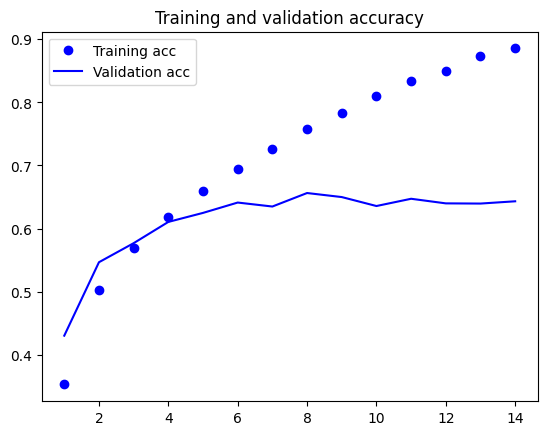

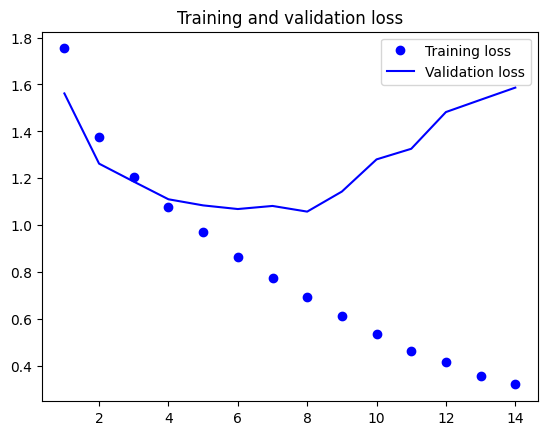

In [ ]:
#Displaying curves of loss and accuracy

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()